ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [1]:
library(goseq)

Loading required package: BiasedUrn
Loading required package: geneLenDataBase
Creating a generic function for ‘nchar’ from package ‘base’ in package ‘S4Vectors’
Loading required package: DBI



In [12]:
library(edgeR)

Loading required package: limma


In [25]:
table.summary=read.table(system.file("extdata","Li_sum.txt",package='goseq'),
	                 sep='\t',header=TRUE,stringsAsFactors=FALSE)
table.summary[1]

,genes
1,ENSG00000215688
2,ENSG00000215689
3,ENSG00000220823
4,ENSG00000242499
5,ENSG00000224938
6,ENSG00000239242
7,ENSG00000243140
8,ENSG00000240187
9,ENSG00000241444
10,ENSG00000242468


In [13]:
counts=table.summary[,-1]
rownames(counts)=table.summary[,1]
grp=factor(rep(c("Control","Treated"),times=c(4,3)))
summarized=DGEList(counts,lib.size=colSums(counts),group=grp)


In [14]:
summarized

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[2]]) result is length 0


,lane1,lane2,lane3,lane4,lane5,lane6,lane8
ENSG00000215688,0,0,0,0,0,0,0
ENSG00000215689,0,0,0,0,0,0,0
ENSG00000220823,0,0,0,0,0,0,0
ENSG00000242499,0,0,0,0,0,0,0
ENSG00000224938,0,0,0,0,0,0,0
ENSG00000239242,0,0,0,0,0,0,0
ENSG00000243140,0,0,0,0,0,0,0
ENSG00000240187,0,0,0,0,0,0,0
ENSG00000241444,0,0,0,0,0,0,0
ENSG00000242468,0,0,0,0,0,0,0


In [16]:
disp=estimateCommonDisp(summarized)
disp$common.dispersion
tested=exactTest(disp)
topTags(tested)


[1] 0.05688364

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


,logFC,logCPM,PValue,FDR
ENSG00000127954,11.55787,6.680748,2.574972e-80,1.274766e-75
ENSG00000151503,5.398963,8.49953,1.781732e-65,4.410322e-61
ENSG00000096060,4.8976,9.446705,7.983756e-60,1.317479e-55
ENSG00000091879,5.737627,6.282646,1.207655e-54,1.494654e-50
ENSG00000132437,-5.880436,7.95191,2.950042e-52,2.920896e-48
ENSG00000166451,4.564246,8.458467,7.126763e-52,5.880292e-48
ENSG00000131016,5.254737,6.607957,1.066807e-51,7.544766e-48
ENSG00000163492,7.0854,5.128514,2.716461e-45,1.681014e-41
ENSG00000113594,4.051053,8.603264,9.272066e-44,5.100255e-40
ENSG00000116285,4.108522,7.864773,6.422468e-43,3.179507e-39


In [17]:
genes=as.integer(p.adjust(tested$table$PValue[tested$table$logFC!=0],
		method="BH")<.05)
names(genes)=row.names(tested$table[tested$table$logFC!=0,])
table(genes)



genes
    0     1 
19535  3208 

In [18]:
head(supportedGenomes())[,1:4]


,db,species,date,name
1,hg38,Human,Dec. 2013,Genome Reference Consortium GRCh38
2,hg19,Human,Feb. 2009,Genome Reference Consortium GRCh37
3,hg18,Human,Mar. 2006,NCBI Build 36.1
4,hg17,Human,May 2004,NCBI Build 35
5,hg16,Human,Jul. 2003,NCBI Build 34
6,vicPac2,Alpaca,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1


Loading hg19 length data...
Warning message:
In pcls(G): initial point very close to some inequality constraints

,DEgenes,bias.data,pwf
ENSG00000230758,0,247,0.0375747
ENSG00000182463,0,3133,0.2043687
ENSG00000124208,0,1978,0.1688177
ENSG00000230753,0,466,0.06927243
ENSG00000224628,0,1510,0.1590353
ENSG00000125835,0,954,0.1271199


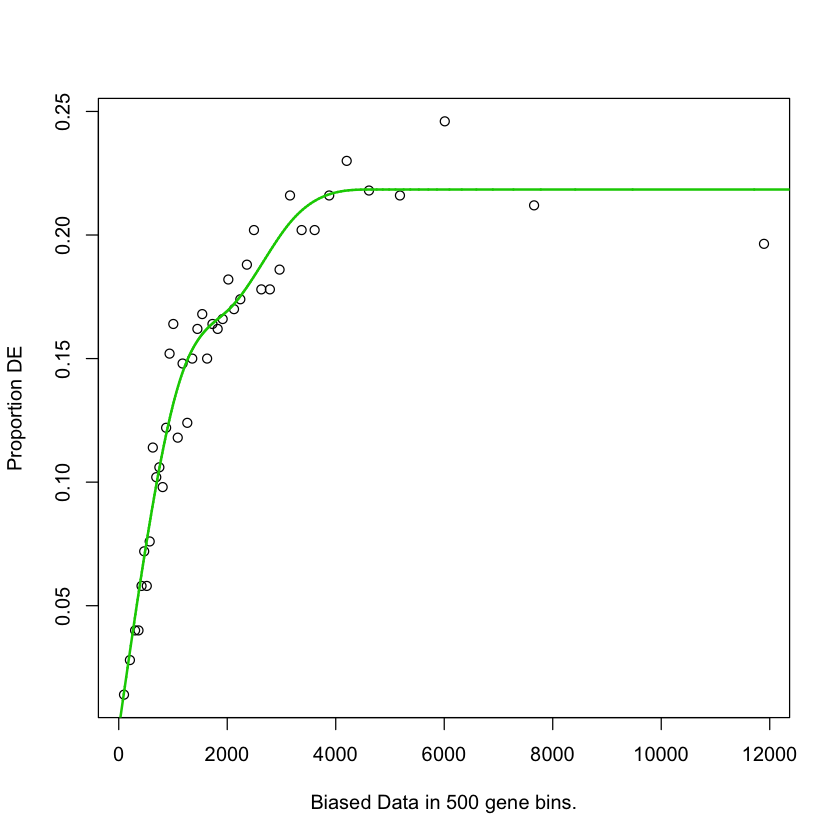

In [19]:
pwf=nullp(genes,"hg19","ensGene")
head(pwf)


In [26]:
pwf


,DEgenes,bias.data,pwf
ENSG00000230758,0,247,0.0375746988103135
ENSG00000182463,0,3133,0.204368653268899
ENSG00000124208,0,1978,0.168817689000079
ENSG00000230753,0,466,0.0692724272691253
ENSG00000224628,0,1510,0.159035323513879
ENSG00000125835,0,954,0.12711991937668
ENSG00000125834,0,6013,0.21840843496722
ENSG00000197818,0,6295,0.218408434967219
ENSG00000243473,0,NA,NA
ENSG00000226325,0,286,0.043375392092373
